In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.chdir("/Users/") # change the path to where you store the data files

# read dataset
news_df = pd.read_csv('news.csv')
price_df = pd.read_csv("price.csv")

In [3]:
news_df.head()

,publication_datetime,title,body,tickers
0,2017-01-03,World News: Police Question Netanyahu Over Gifts,"""We pay attention to publications in the media...",EL
1,2017-01-03,Business News: Nestle Turns to New CEO for Hea...,"Nestle, the world's largest packaged-food comp...",GIS
2,2017-01-03,Business News: Vermont Drug Law Faces Limits -...,"The Vermont law, enacted in June, instructed s...",ABBV
3,2017-01-03,Life & Arts -- Travel: How Hotel Companies Lau...,Travelers are about to see a flurry of new hot...,HLT
4,2017-01-03,Businesses Ready to Ramp Up Investment --- Aft...,The Federal Reserve last month signaled intere...,HD


In [4]:
news_df.shape

(20550, 4)

In [5]:
price_df.head()

,Date,ticker,close
0,2017-01-03,A,43.743862
1,2017-01-04,A,44.317825
2,2017-01-05,A,43.790924
3,2017-01-06,A,45.155281
4,2017-01-09,A,45.296406


In [6]:
price_df['ticker'].unique()

array(['A', 'AAPL', 'ABBV', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM',
       'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG',
       'AKAM', 'ALB', 'ALGN', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME',
       'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AON', 'AOS', 'APA',
       'APD', 'APH', 'APO', 'APTV', 'ARE', 'ATO', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXON', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBY',
       'BDX', 'BEN', 'BG', 'BIIB', 'BK', 'BKNG', 'BKR', 'BLDR', 'BLK',
       'BMY', 'BR', 'BRO', 'BSX', 'BWA', 'BX', 'BXP', 'C', 'CAG', 'CAH',
       'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE',
       'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX',
       'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO',
       'COP', 'COR', 'COST', 'CPAY', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM',
       'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTRA', 'CTSH', 'CVS', 'CVX', 'CZR',
       'D', 'DAL', 'DD', 'DE', 'DECK', 'DELL', 'DFS', 'DG', 

In [7]:
date_range = news_df['publication_datetime'].min(), news_df['publication_datetime'].max()
print(f"Date range of publication_datetime: {date_range}")

Date range of publication_datetime: ('2017-01-03', '2020-12-30')


In [8]:
date_range = price_df['Date'].min(), price_df['Date'].max()
print(f"Date range in price_df: {date_range}")

Date range in price_df: ('2017-01-03', '2021-12-30')


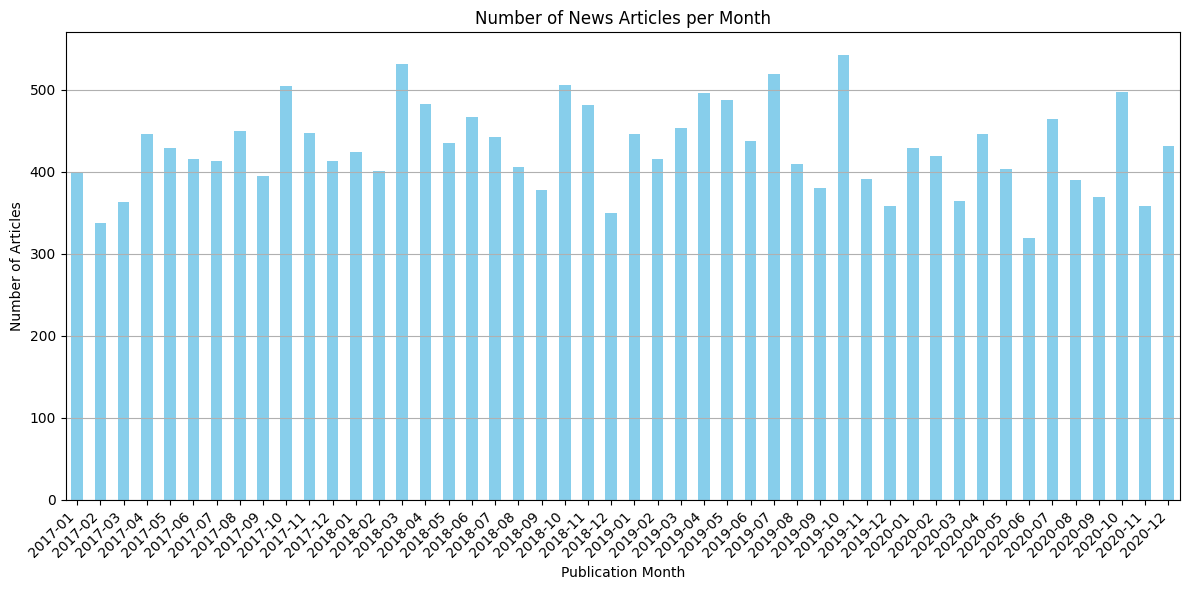

In [9]:
# Convert publication_datetime to datetime format
news_df['publication_datetime'] = pd.to_datetime(news_df['publication_datetime'])

# Group by month and count the number of news articles
monthly_news_count = news_df.resample('M', on='publication_datetime').size()

# Plotting
plt.figure(figsize=(12, 6))
monthly_news_count.plot(kind='bar', color='skyblue')
plt.title('Number of News Articles per Month')
plt.xlabel('Publication Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')  # Set rotation without labels
plt.xticks(ticks=range(len(monthly_news_count)), labels=monthly_news_count.index.strftime('%Y-%m'), rotation=45, ha='right')  # Set ticks and labels
plt.grid(axis='y')
plt.tight_layout()
plt.show()


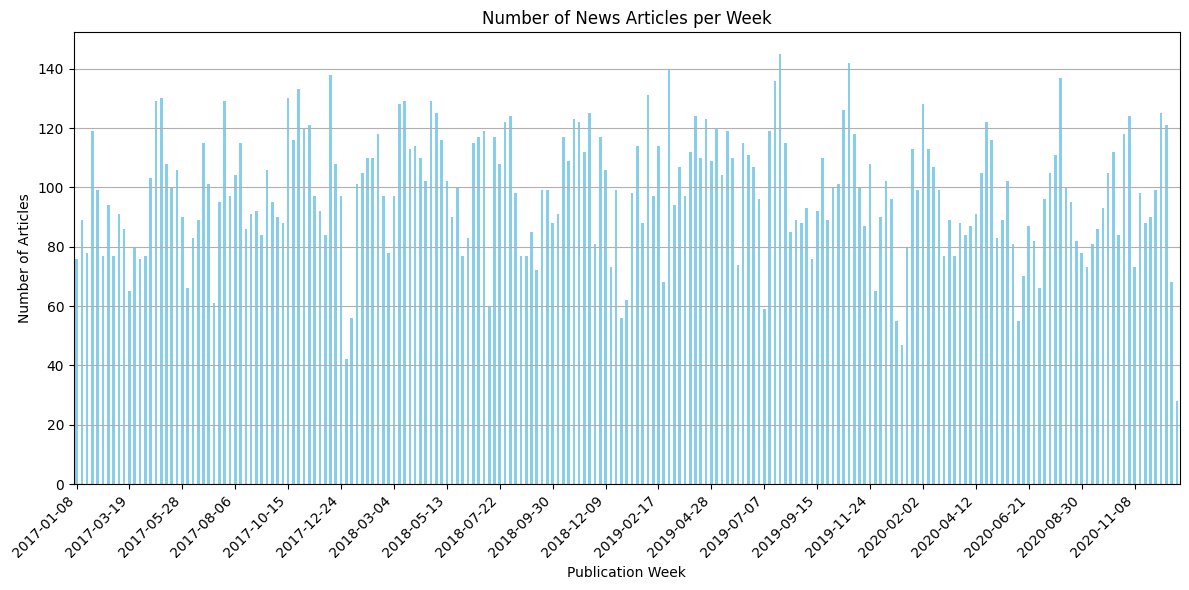

In [10]:
# Convert publication_datetime to datetime format
news_df['publication_datetime'] = pd.to_datetime(news_df['publication_datetime'])

# Group by week and count the number of news articles
monthly_news_count = news_df.resample('W', on='publication_datetime').size()

# Plotting
plt.figure(figsize=(12, 6))
monthly_news_count.plot(kind='bar', color='skyblue')
plt.title('Number of News Articles per Week')
plt.xlabel('Publication Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')  # Set rotation without labels
plt.xticks(ticks=range(0, len(monthly_news_count), 10), labels=monthly_news_count.index[::10].strftime('%Y-%m-%d'), rotation=45, ha='right')  # Set ticks and labels every 10 weeks
plt.grid(axis='y')
plt.tight_layout()
plt.show()


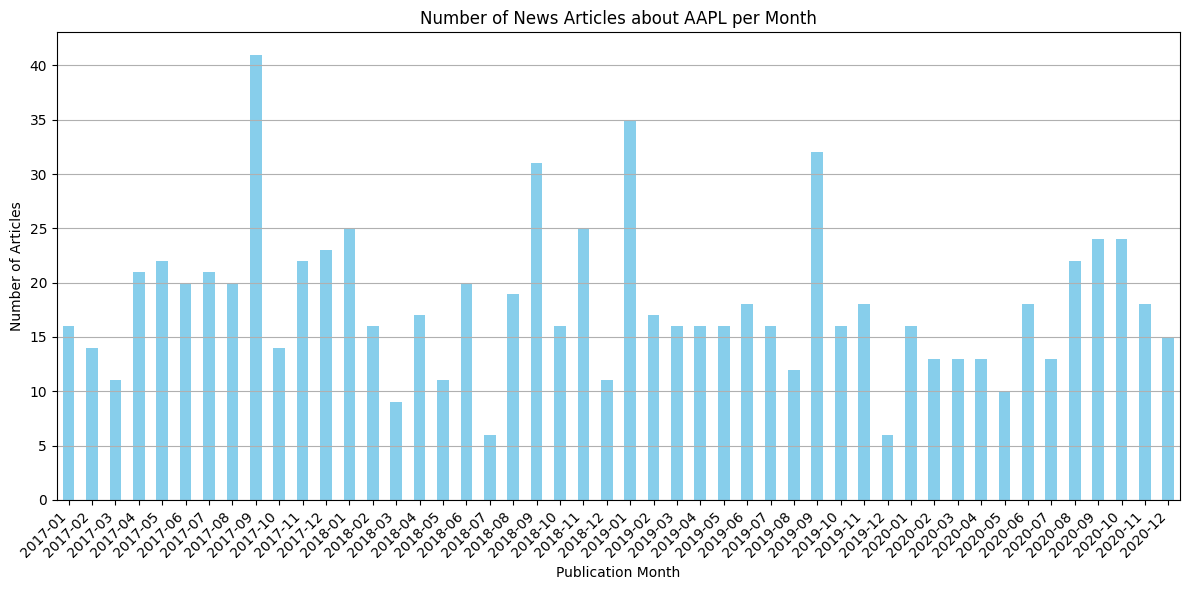

In [11]:
# Convert publication_datetime to datetime format
news_df['publication_datetime'] = pd.to_datetime(news_df['publication_datetime'])

# Filter articles that mention AAPL
aapl_articles = news_df[news_df['tickers'].apply(lambda x: 'AAPL' in x)]

# Group by month and count the number of news articles about AAPL
monthly_aapl_news_count = aapl_articles.resample('M', on='publication_datetime').size()

# Plotting
plt.figure(figsize=(12, 6))
monthly_aapl_news_count.plot(kind='bar', color='skyblue')
plt.title('Number of News Articles about AAPL per Month')
plt.xlabel('Publication Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')  # Set rotation without labels
plt.xticks(ticks=range(len(monthly_aapl_news_count)), labels=monthly_aapl_news_count.index.strftime('%Y-%m'), rotation=45, ha='right')  # Set ticks and labels
plt.grid(axis='y')
plt.tight_layout()
plt.show()

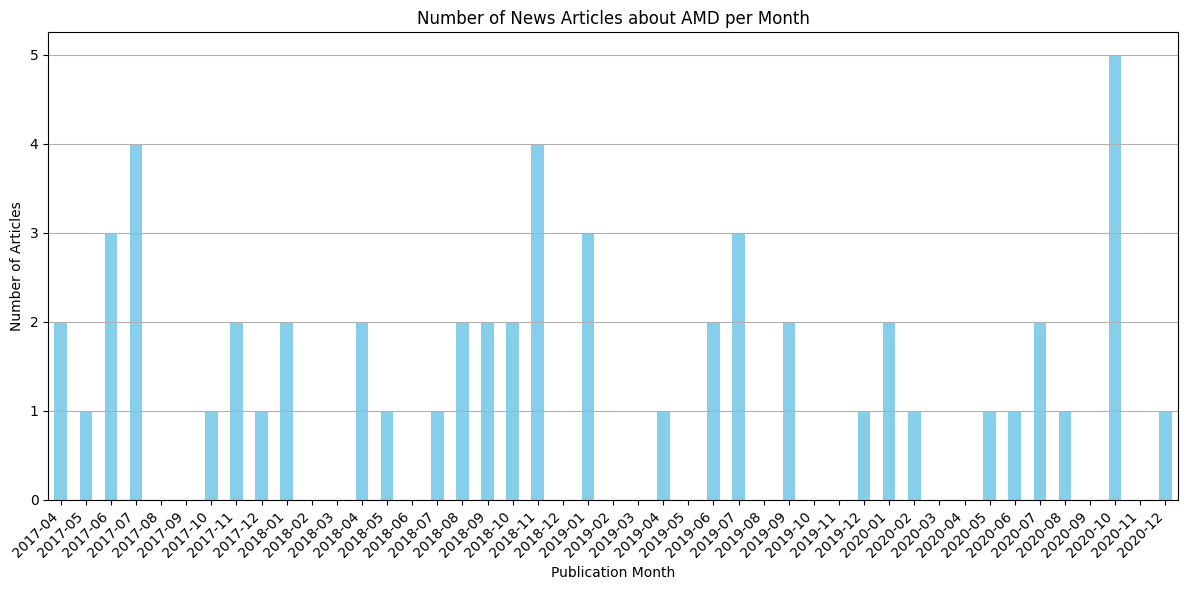

In [12]:
# Convert publication_datetime to datetime format
news_df['publication_datetime'] = pd.to_datetime(news_df['publication_datetime'])

# Filter articles that mention AMD
amd_articles = news_df[news_df['tickers'].apply(lambda x: 'AMD' in x)]

# Group by month and count the number of news articles about AMD
monthly_amd_news_count = amd_articles.resample('M', on='publication_datetime').size()

# Plotting
plt.figure(figsize=(12, 6))
monthly_amd_news_count.plot(kind='bar', color='skyblue')
plt.title('Number of News Articles about AMD per Month')
plt.xlabel('Publication Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')  # Set rotation without labels
plt.xticks(ticks=range(len(monthly_amd_news_count)), labels=monthly_amd_news_count.index.strftime('%Y-%m'), rotation=45, ha='right')  # Set ticks and labels
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Pretrained Large Language Model: FinBERT

In [13]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load FinBERT model and tokenizer: https://huggingface.co/yiyanghkust/finbert-tone
finbert_tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')

In [14]:
# print the maximum length of input tokens
print(f"The maximum length of input tokens for FinBERT: {finbert.config.max_position_embeddings}")

The maximum length of input tokens for FinBERT: 512


In [15]:
def predict_sentiment(text):
    inputs = finbert_tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = finbert(**inputs)
    scores = outputs.logits.softmax(dim=1).numpy()[0]
    return scores

In [16]:
# Convert the list of scores into a DataFrame with separate columns
sentiment_df = pd.DataFrame(news_df['body'].apply(predict_sentiment).tolist(), columns=['neutral', 'positive', 'negative'])

# Append the new columns to news_df
news_df = pd.concat([news_df.reset_index(drop=True), sentiment_df], axis=1)

In [17]:
# save FinBERT sentiment
news_df.to_csv("news_w_sentiment.csv", index = False)

In [19]:
news_df.tail()

,publication_datetime,title,body,tickers,neutral,positive,negative
20545,2020-12-30,Terms in Google Ad Deal Revealed,"Ten Republican attorneys general, led by Texas...",GOOGL,0.233787,0.031028,0.735185
20546,2020-12-30,'Son of Sam' Law Invoked in Phony Heiress Case,"Last year, the New York state attorney general...",NFLX,0.999567,0.000021,0.000413
20547,2020-12-30,Boeing MAX Returns to U.S. Sky,Daily round-trip flights between Miami and New...,BA,0.999890,0.000064,0.000045
20548,2020-12-30,"To Curb Ma's Empire, China Weighs Taking a Big...","The regulators, led by the central bank, also ...",PYPL,0.996614,0.002923,0.000463
20549,2020-12-30,Slack Deal Shows Handcuffs on Tech Firms,Salesforce.com's $27.7 billion acquisition of ...,CRM,0.973937,0.024925,0.001138


## Fine-tune BERT

In [6]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel

In [7]:
# create the feature daily_return based on close price
price_df['daily_return'] = price_df.groupby('ticker')['close'].transform(lambda x: x.pct_change())
price_df = price_df.dropna()

# Convert dates to datetime
news_df['publication_datetime'] = pd.to_datetime(news_df['publication_datetime'])
price_df['Date'] = pd.to_datetime(price_df['Date'])

In [8]:
# Initialize BERT tokenizer and model: https://huggingface.co/google-bert/bert-base-uncased
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_model.eval()  # Set to evaluation mode

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [9]:
# Create a custom dataset
class NewsDataset(Dataset):
    def __init__(self, news_data, price_data, tokenizer, bert_model, max_length=512):
        self.news_data = news_data
        self.price_data = price_data
        self.tokenizer = tokenizer
        self.bert_model = bert_model
        self.max_length = max_length
        
        # Create a mapping of (date, ticker) to daily return
        self.return_map = price_data.set_index(['Date', 'ticker'])['daily_return'].to_dict()
        
        # Pre-compute BERT embeddings for all articles
        self.embeddings = []
        
        print("Computing BERT embeddings for all articles...")
        with torch.no_grad():
            for idx in range(len(news_data)):
                if idx % 1000 == 0:
                    print(f"Processing article {idx}/{len(news_data)}")
                    
                text = news_data.iloc[idx]['body']
                inputs = self.tokenizer(text, 
                                      return_tensors='pt',
                                      max_length=self.max_length,
                                      padding='max_length',
                                      truncation=True)
                
                outputs = self.bert_model(**inputs)
                # Use [CLS] token embedding as the document embedding
                embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
                self.embeddings.append(embedding)
                
        self.embeddings = np.array(self.embeddings)
        print("Finished computing embeddings.")
        
    def __len__(self):
        return len(self.news_data)
    
    def __getitem__(self, idx):
        news_row = self.news_data.iloc[idx]
        date = news_row['publication_datetime']
        ticker = news_row['tickers']
        
        # Get the next trading day's return
        next_trading_days = self.price_data[
            (self.price_data['Date'] >= date) & 
            (self.price_data['ticker'] == ticker)
        ]['Date'].unique()
        
        if len(next_trading_days) > 0:
            next_date = next_trading_days[0]
            daily_return = self.return_map.get((next_date, ticker), 0)
        else:
            daily_return = 0
            
        # Get pre-computed BERT embedding
        bert_embedding = self.embeddings[idx]
        
        return torch.FloatTensor(bert_embedding), torch.FloatTensor([daily_return])

In [10]:
# Define the neural network
class ReturnPredictor(nn.Module):
    def __init__(self, input_size=768, hidden_size=256):  # BERT base has 768 dimensions
        super(ReturnPredictor, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_size // 2, 1)
        )
    
    def forward(self, x):
        return self.network(x)

In [11]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Move BERT model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bert_model.to(device)

print("Creating datasets...")
# Create datasets
train_dataset = NewsDataset(
    news_df[news_df['publication_datetime'] < '2019-01-01'],
    price_df,
    tokenizer,
    bert_model
)

val_dataset = NewsDataset(
    news_df[(news_df['publication_datetime'] >= '2019-01-01') & 
            (news_df['publication_datetime'] < '2020-01-01')],
    price_df,
    tokenizer,
    bert_model
)

test_dataset = NewsDataset(
    news_df[news_df['publication_datetime'] >= '2020-01-01'],
    price_df,
    tokenizer,
    bert_model
)

Creating datasets...
Computing BERT embeddings for all articles...
Processing article 0/10320
Processing article 1000/10320
Processing article 2000/10320
Processing article 3000/10320
Processing article 4000/10320
Processing article 5000/10320
Processing article 6000/10320
Processing article 7000/10320
Processing article 8000/10320
Processing article 9000/10320
Processing article 10000/10320
Finished computing embeddings.
Computing BERT embeddings for all articles...
Processing article 0/5338
Processing article 1000/5338
Processing article 2000/5338
Processing article 3000/5338
Processing article 4000/5338
Processing article 5000/5338
Finished computing embeddings.
Computing BERT embeddings for all articles...
Processing article 0/4892
Processing article 1000/4892
Processing article 2000/4892
Processing article 3000/4892
Processing article 4000/4892
Finished computing embeddings.


In [12]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [13]:
# Initialize model, criterion, optimizer
model = ReturnPredictor().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_losses = []
val_losses = []
num_epochs = 10

# Train the model
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_bert, batch_returns in train_loader:
        batch_bert = batch_bert.to(device)
        batch_returns = batch_returns.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_bert)
        loss = criterion(outputs, batch_returns)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_bert, batch_returns in val_loader:
            batch_bert = batch_bert.to(device)
            batch_returns = batch_returns.to(device)
            outputs = model(batch_bert)            
            val_loss += criterion(outputs, batch_returns).item()
    
    train_losses.append(train_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')
        

Epoch [1/10], Train Loss: 0.0010, Val Loss: 0.0009
Epoch [2/10], Train Loss: 0.0006, Val Loss: 0.0009
Epoch [3/10], Train Loss: 0.0006, Val Loss: 0.0009
Epoch [4/10], Train Loss: 0.0006, Val Loss: 0.0009
Epoch [5/10], Train Loss: 0.0005, Val Loss: 0.0009
Epoch [6/10], Train Loss: 0.0005, Val Loss: 0.0009
Epoch [7/10], Train Loss: 0.0005, Val Loss: 0.0009
Epoch [8/10], Train Loss: 0.0006, Val Loss: 0.0009
Epoch [9/10], Train Loss: 0.0006, Val Loss: 0.0009
Epoch [10/10], Train Loss: 0.0005, Val Loss: 0.0009


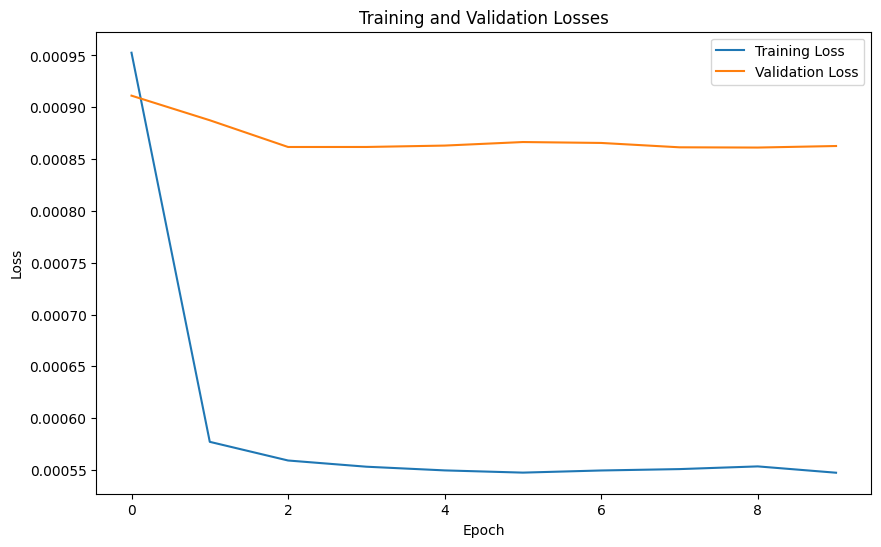

In [14]:
# Plot training curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
def calculate_r2(y_true, y_pred, in_sample=True, benchmark=None):
    if in_sample:
        return 1 - (np.sum((y_true - y_pred) ** 2) / 
                    np.sum((y_true - np.mean(y_true)) ** 2))
    else:
        if benchmark is None:
            raise ValueError("Benchmark must be provided for out-of-sample R-squared calculation.")
        return 1 - (np.sum((y_true - y_pred) ** 2) / 
                    np.sum((y_true - benchmark) ** 2))

In [35]:
# Evaluate on test set
model.eval()
test_predictions = []
test_actuals = []

with torch.no_grad():
    for batch_bert, batch_returns in test_loader:
        batch_bert = batch_bert.to(device)
        outputs = model(batch_bert)
        test_predictions.extend(outputs.cpu().numpy())
        test_actuals.extend(batch_returns.numpy())

test_predictions = np.array(test_predictions)
test_actuals = np.array(test_actuals)

# Calculate metrics
r2 = calculate_r2(test_actuals, test_predictions, in_sample=False, benchmark = 0)

print(f'Test R2 Score: {r2:.6f}')

Test R2 Score: -0.000512


In [22]:
# append the prediction to the test set
news_df_test = news_df.loc[news_df['publication_datetime'] >= '2020-01-01'].copy()
news_df_test.loc[:, 'sentiment'] = test_predictions 

In [23]:
news_df_test.head()

,publication_datetime,title,body,tickers,sentiment
15658,2020-01-02,Apple Keeps Alerting Users on Tracking --- iPh...,Apple touted the new notifications as a way to...,AAPL,0.001790
15659,2020-01-02,Boeing's Commitment To Automation Grows,"Now, such changes seek to address the fact tha...",BA,0.001790
15660,2020-01-02,Life & Arts -- The Middle Seat: Frequent-Flier...,Travelers complain the adjustments amount to a...,UAL,0.001790
15661,2020-01-02,Google AI for Breast Cancer Shows Promise,The model is the latest step in Google's push ...,GOOGL,0.001790
15662,2020-01-02,Business News: Tesla Looks to China for Growth...,"China, the world's largest new-car market, is ...",TSLA,0.001911


## Sentiment and Market Trend

### Pretrained FinBERT

In [49]:
# read the news data with FinBERT sentiment
news_w_sentiment = pd.read_csv('news_w_sentiment.csv')

news_w_sentiment.head()

,publication_datetime,title,body,tickers,neutral,positive,negative
0,2017-01-03,World News: Police Question Netanyahu Over Gifts,"""We pay attention to publications in the media...",EL,0.999937,0.000002,0.000060
1,2017-01-03,Business News: Nestle Turns to New CEO for Hea...,"Nestle, the world's largest packaged-food comp...",GIS,0.444896,0.551796,0.003308
2,2017-01-03,Business News: Vermont Drug Law Faces Limits -...,"The Vermont law, enacted in June, instructed s...",ABBV,0.999891,0.000026,0.000083
3,2017-01-03,Life & Arts -- Travel: How Hotel Companies Lau...,Travelers are about to see a flurry of new hot...,HLT,0.999991,0.000006,0.000003
4,2017-01-03,Businesses Ready to Ramp Up Investment --- Aft...,The Federal Reserve last month signaled intere...,HD,0.984549,0.013953,0.001498


In [50]:
# create sentiment score
news_w_sentiment['sentiment'] = news_w_sentiment['positive'] - news_w_sentiment['negative']
news_df_test = news_w_sentiment.loc[news_df['publication_datetime'] >= '2020-01-01'].copy()

# monthly sentiment
news_df_test['publication_datetime'] = pd.to_datetime(news_w_sentiment['publication_datetime'])
monthly_sentiment = news_df_test.groupby(news_df_test['publication_datetime'].dt.to_period('M'))['sentiment'].mean().reset_index()
monthly_sentiment.columns = ['month', 'sentiment']

In [51]:
def calculate_sp_return(month):
    current_period = price_df.loc[
        (price_df['Date'] >= month.start_time) & 
        (price_df['Date'] < (month + 1).start_time) & 
        (price_df['ticker'] == 'SPX')
    ]
    
    next_period = price_df.loc[
        (price_df['Date'] >= (month + 1).start_time) & 
        (price_df['Date'] < (month + 2).start_time) & 
        (price_df['ticker'] == 'SPX')
    ]
    
    if not current_period.empty and not next_period.empty:
        return (current_period['close'].iloc[-1] / next_period['close'].iloc[-1]) - 1
    else:
        return None

In [52]:
# monthly return for S&P500; the return is calculated based on the close price at the last trading date of the current month and that of the next month
monthly_sentiment['SP_return'] = monthly_sentiment['month'].apply(calculate_sp_return)

In [53]:
# display the result
monthly_sentiment

,month,sentiment,SP_return
0,2020-01,0.047091,0.091835
1,2020-02,-0.018263,0.143013
2,2020-03,-0.150658,-0.112566
3,2020-04,-0.142398,-0.043320
4,2020-05,-0.079214,-0.018056
5,2020-06,-0.006694,-0.052224
6,2020-07,-0.016954,-0.065477
7,2020-08,0.083236,0.040830
8,2020-09,0.054316,0.028453
9,2020-10,0.037162,-0.097103


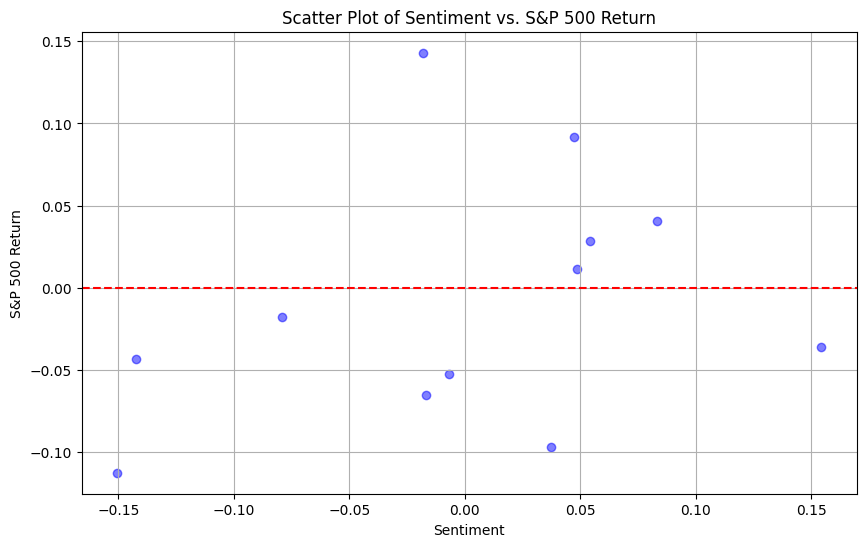

In [54]:
# scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(monthly_sentiment['sentiment'], monthly_sentiment['SP_return'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Sentiment vs. S&P 500 Return')
plt.xlabel('Sentiment')
plt.ylabel('S&P 500 Return')
plt.grid(True)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

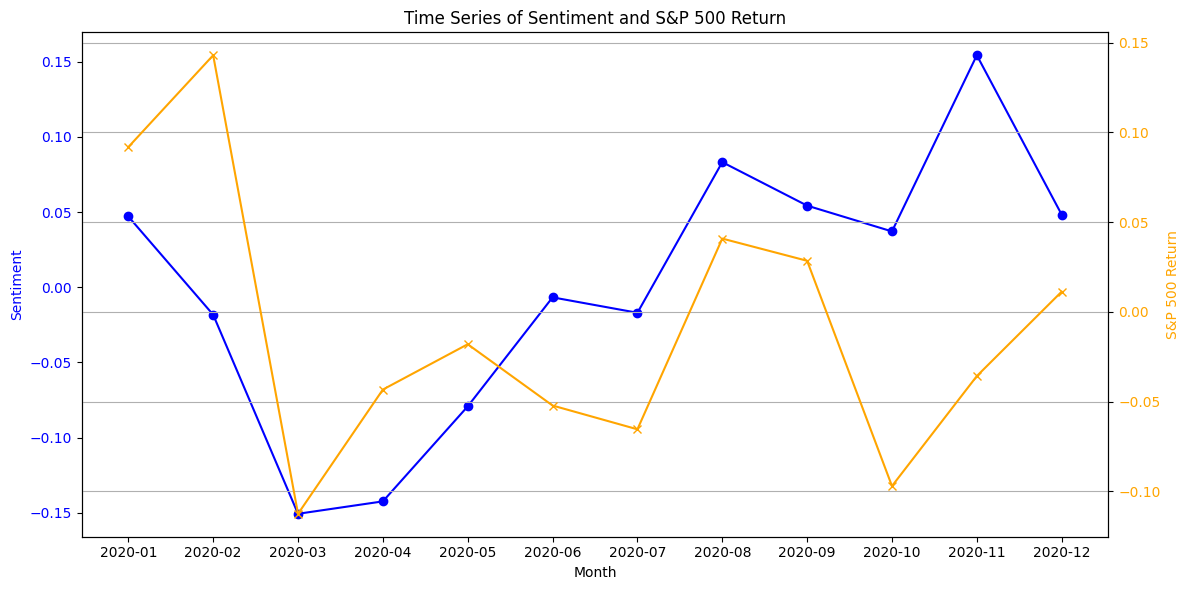

In [55]:
# time-series plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Convert 'month' to a string format for plotting
ax1.set_xlabel('Month')
ax1.set_ylabel('Sentiment', color='blue')
ax1.plot(monthly_sentiment['month'].astype(str), monthly_sentiment['sentiment'], label='Sentiment', color='blue', marker='o')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the S&P 500 return
ax2 = ax1.twinx()  
ax2.set_ylabel('S&P 500 Return', color='orange')  
ax2.plot(monthly_sentiment['month'].astype(str), monthly_sentiment['SP_return'], label='S&P 500 Return', color='orange', marker='x')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Time Series of Sentiment and S&P 500 Return')
fig.tight_layout()  
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Fine-tuned Model

In [44]:
# append the prediction to the test set
news_df_test = news_df.loc[news_df['publication_datetime'] >= '2020-01-01'].copy()
news_df_test.loc[:, 'sentiment'] = test_predictions 

# monthly sentiment
news_df_test['publication_datetime'] = pd.to_datetime(news_df_test['publication_datetime'])
monthly_sentiment = news_df_test.groupby(news_df_test['publication_datetime'].dt.to_period('M'))['sentiment'].mean().reset_index()
monthly_sentiment.columns = ['month', 'sentiment']

In [46]:
# monthly return for S&P500; the return is calculated based on the close price at the last trading date of the current month and that of the next month
monthly_sentiment['SP_return'] = monthly_sentiment['month'].apply(calculate_sp_return)

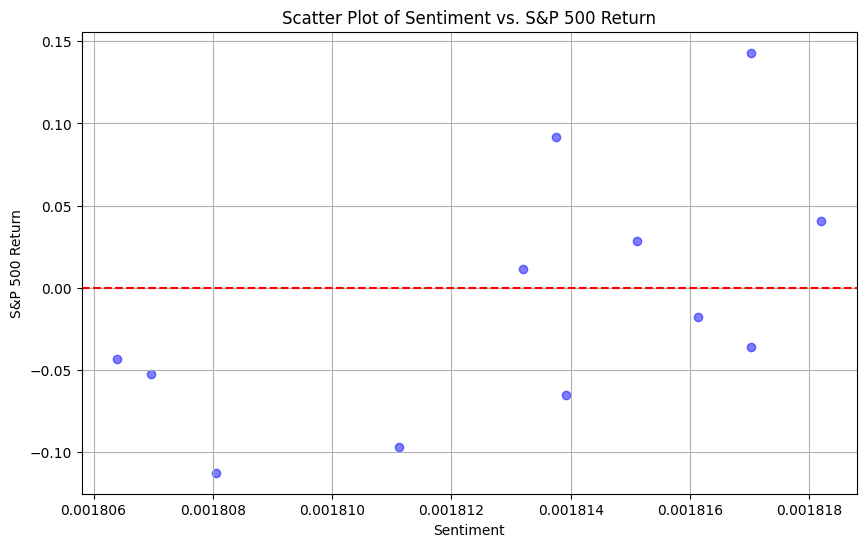

In [47]:
# scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(monthly_sentiment['sentiment'], monthly_sentiment['SP_return'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Sentiment vs. S&P 500 Return')
plt.xlabel('Sentiment')
plt.ylabel('S&P 500 Return')
plt.grid(True)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

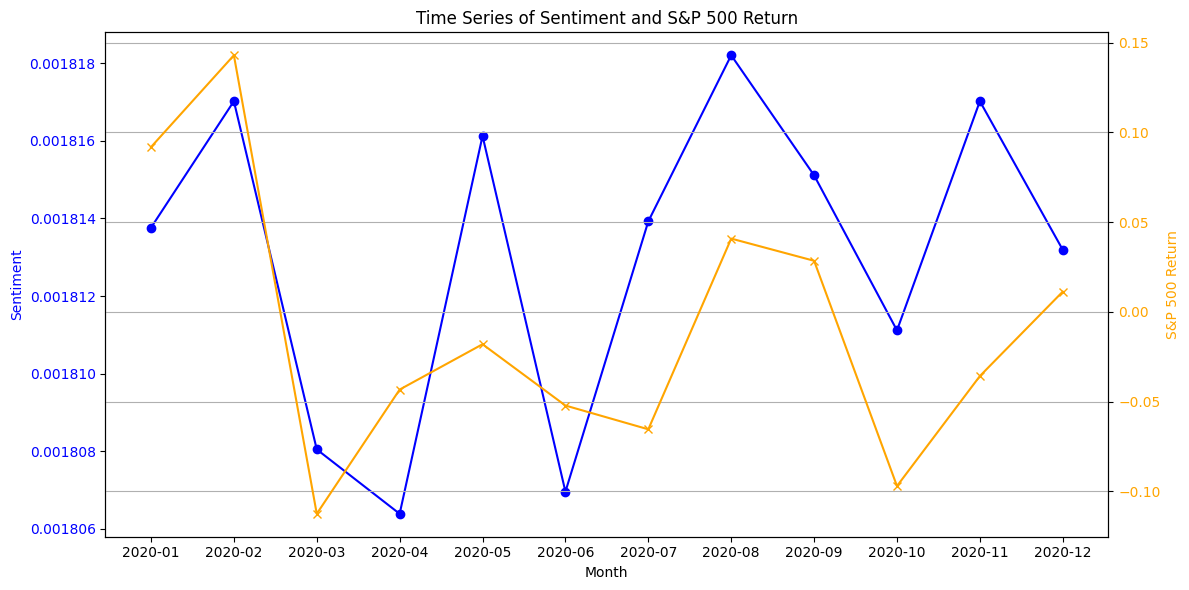

In [48]:
# time-series plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Convert 'month' to a string format for plotting
ax1.set_xlabel('Month')
ax1.set_ylabel('Sentiment', color='blue')
ax1.plot(monthly_sentiment['month'].astype(str), monthly_sentiment['sentiment'], label='Sentiment', color='blue', marker='o')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the S&P 500 return
ax2 = ax1.twinx()  
ax2.set_ylabel('S&P 500 Return', color='orange')  
ax2.plot(monthly_sentiment['month'].astype(str), monthly_sentiment['SP_return'], label='S&P 500 Return', color='orange', marker='x')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Time Series of Sentiment and S&P 500 Return')
fig.tight_layout()  
plt.grid(True)
plt.xticks(rotation=45)
plt.show()